<a href="https://colab.research.google.com/github/yaarikk21/DA-course/blob/main/%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Почну з питань, напишу одразу 3 питання і далі буду по чері будувати графіки та нумерувати їх.

## **1. Яка середня кількість зареєстрованих та незареєстрованих користувачів по місяцях?**


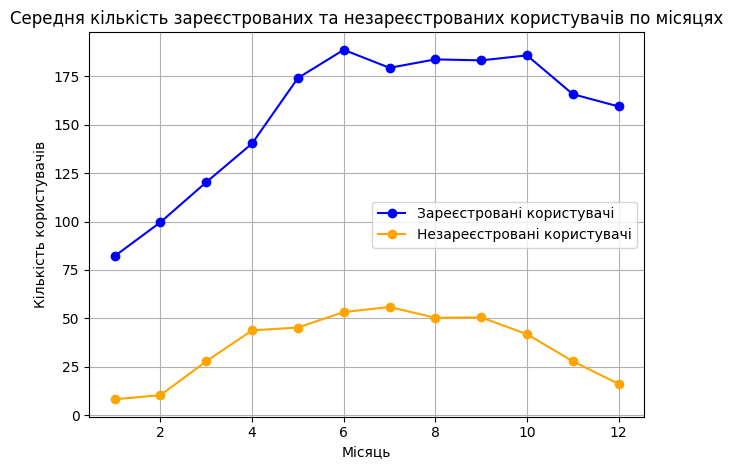

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)
df['month'] = df.datetime.dt.month

monthly_users = df.groupby('month')[['registered', 'casual']].mean()

plt.plot(monthly_users.index, monthly_users['registered'], label='Зареєстровані користувачі', color='blue', marker='o')
plt.plot(monthly_users.index, monthly_users['casual'], label='Незареєстровані користувачі', color='orange', marker='o')
plt.title('Середня кількість зареєстрованих та незареєстрованих користувачів по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Кількість користувачів')
plt.legend()
plt.grid(True)
plt.tight_layout();

# **2. Чи є зв'язок між вологістю та загальною кількістю користувачів?**

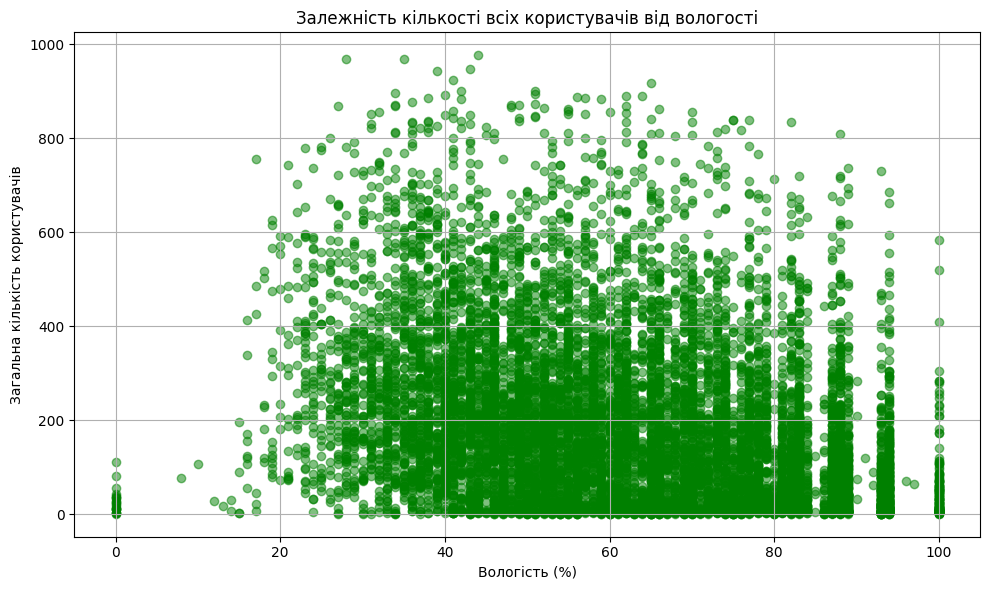

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['count'], alpha=0.5, color='green')
plt.title('Залежність кількості всіх користувачів від вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Загальна кількість користувачів')
plt.grid(True)
plt.tight_layout()

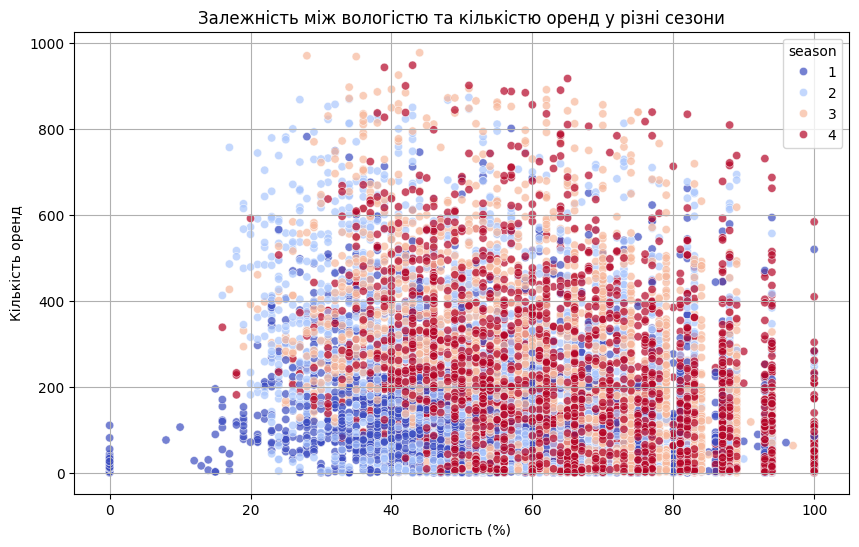

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='count', hue='season', data=df, palette='coolwarm', alpha=0.7)

plt.title('Залежність між вологістю та кількістю оренд у різні сезони')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.show()


# **3.Чи є зв'язок між температурою там кількістю оренд?**



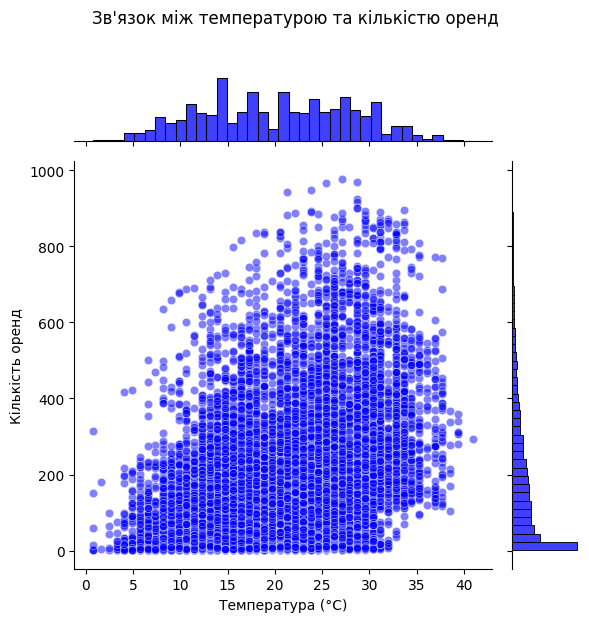

In [72]:
sns.jointplot(x='temp', y='count', data=df, kind='scatter', color='blue', alpha=0.5)

plt.suptitle('Зв\'язок між температурою та кількістю оренд', y=1.03)
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.tight_layout();